![Image of Games](https://www.hotspawn.com/app/uploads/2019/01/fgc_ultimate_genesis6.jpg)

# Exploring Video Games Since 1980
## Analysis of Video Game Sales and Reviews
By: Sean Mills, Cory Lau, Geoffrey Wang

## Contents
1. Introduction
2. Required Libraries
3. Data Collection
4. Data Processing
5. Exploratory Analysis and Data Visualization
<br>    5.1 The Growth of Video Games
<br>    5.2 Analyzing Sales Over Time
<br>    5.3 Highest Grossing Video Games
<br>    5.4 Analyzing Video Games based on Scores and Reviews
<br>    5.5 Investigating Publisher Data
<br>    5.6 Which types of games are the most popular on which platforms?
<br>    5.7 Top performing platforms
6. Machine Learning and Analysis
<br>    6.1 Data Prepping
<br>    6.2 Performing Analysis
<br>    6.3 Testing Our Model
7. Concluding Thoughts

## 1. Introduction
Since video games emerged into the scene almost four decades ago, the industry has become one of the biggest players in entertainment. In 2016, the global video games market was valued at almost [75 billion U.S. dollars](https://www.statista.com/topics/1680/gaming/) and in 2018 [43% of U.S. adults](https://www.pewresearch.org/fact-tank/2018/09/17/5-facts-about-americans-and-video-games/) said that they often or sometimes play video games. As video games continue to grow and evolve, they also present interesting findings into consumer habits and spending patterns. In this project we analyze data from thousands of video games dating back multiple decades to find patterns and trends in sales, genres, platforms, and reviews. Additionally, we will use game characteristics to try to predict a game's total global sales. 

## 2. Required Libraries:
The following python libraries are used for our data analysis:
1. Pandas: Primary library used, provides data collection, managment, and analysis functionality
2. Numpy: Provides data types used for data frames and linear algebra functionality
3. Matplotlib: Adds additional functionality for plotting
4. Seaborn: Used for more sophisticated plots, such as heat maps and density plots
5. sklrean: Provides machine learning models for more sohpisticated analysis

## 3. Data Collection
  
This dataset showcases video games from a variety of platforms and genres along with their corresponding critic and user scores from Metacritic. The data only includes games with more than 100,000 copies sold, starting from 1980. Column details are provided below: 
- Name: Game's name
- Platform: Platform of release (PS4,Wii,etc.). Note that if a game was released on multiple platforms it will appear multiple times in the list
- Year_of_Release: Year game was released
- Genre: Game's genre. Possible values are sports, platform, racing, role-playing, puzzle, shooter, simulation, action, fighting, adventure, strategy, and misc.
- Publisher: Game pushlisher
- NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales: Sales in millions of units sold in North America, European Union, Japan, elsewhere, and gloabally, respectfully.
- Critic_Score: Average critic score from Metacritic. On a 0-100 scale
- Critic_Count: Total number of reviews from critics
- User_Score: Average user score and review count from Metacritic. On a 0-10 scale
- User_Count: Total number of user reviews
- Developer: Specific devision responsible for developing the game
- Rating: ESRB rating

The dataset is from Kaggle and utilizes a webscrape from VGChartz for the sales data and a webscrape from Metacritic for the reviews and ratings data. 

Data source: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data

Load dataset and view using pandas read_csv:

In [32]:
# Load dataset into a DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read data stored in csv file into pandas DataFrame
data = pd.read_csv('video_game_sales.csv')
# View first 15 rows from DataFrame
data.head(n=15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Processing Data
This dataset was last updated at the start of 2017, however we want the data to be as complete and as accurate as possible for analysis. Therefore, entries in the dataset that exist after 2016 are filtered out for accuracy. We also filter out video games with a user score of 'tbd' so that we can observe the relationship between user scores and critic scores of the video games later on. Lastly, we convert from floats to integers in the year of release, critic count and user count columns for clearer readability.

In [2]:
# Filter data to remove video games released between 2017 and 2020
data = data[data.apply(lambda row: row['Year_of_Release'] not in (2017.0, 2020.0), axis=1)]
# Filter data to remove video games with a user score of 'tbd'
data = data[data['User_Score'] != 'tbd']
# Convert user score to float (was previously string due to 'tbd')
data['User_Score'] = data['User_Score'].astype(np.float64)
# Convert Year_of_Release, Critic_Count, and User_Count to integer
data[['Year_of_Release', 'Critic_Count', 'User_Count']] = data[['Year_of_Release', 'Critic_Count', 
                                                                'User_Count']].astype('Int64')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Exploratory Analysis and Data Visualization

Now that we have a cleaner dataset to work with, we can arrange and further modify the data for the next step in the process, data visualization and analysis.

### 5.1 The Growth of Video Games

One simple question we can ask to see how the number of video games in our data set per year has changed over time. To do this we used the value_counts() function to get the total number of entries per year and plot this data in a bar chart, shown below:

Text(0, 0.5, 'Number of Video Games Released')

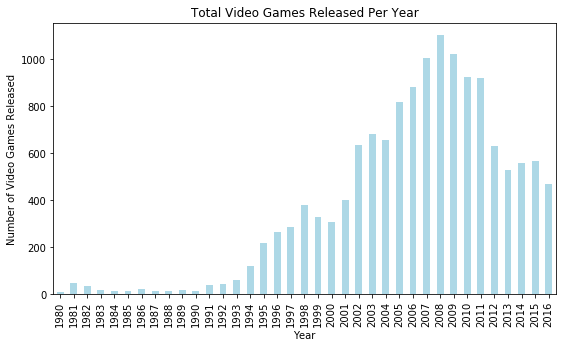

In [20]:
# PLot total video games per year
%matplotlib inline
# Store axis object for plotting
ax = data['Year_of_Release'].value_counts().sort_index().plot(kind='bar', title='Total Video Games Released Per Year', 
                                                             figsize=(9, 5), color='lightblue')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Video Games Released')

This graph is demonstrating the growth of video games over time. Significant increases in the number of video games released occur throughout the timeline, such as in 1995, 2002, and 2005. As technology advances and new consoles and comptabilities arrive, it makes sense as to why the number of games for consumers to enjoy increases over time. Unexpectedly, there is a drop off in the number of video games released starting in 2012. Especially since the next generation of consoles like the Xbox One and PS4 are coming out around this time, this comes as a slight surprise. 

### 5.2 Analyzing Sales Over Time

By grouping the data by year of release, we can compare the sales per year between each region over time:

In [22]:
# Generate DataFrames for data by year and sales per year
data_by_year = data.dropna().groupby('Year_of_Release')
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
# Aggregate all of the sales columns by year to get the total sales per year
sales_per_year = data_by_year[sales_cols].agg(np.sum)
sales_per_year.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


Text(0, 0.5, 'Total Sales (in millions of units)')

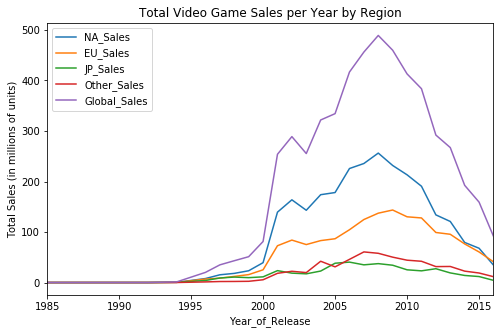

In [4]:
# PLot total video game sales per year
ax = sales_per_year.plot(figsize=(8, 5), title='Total Video Game Sales per Year by Region')
ax.set_ylabel('Total Sales (in millions of units)')

Here we observe that North America has had the most sales compared to every other region, maintaining this trend up until around 2014 where it begins to meet with total European sales, who come in second. Major peaks in sales for both of these regions begin in 2000 and another in 2005, with a drop off around 2008. Japan and the rest of the world are the lowest of the 4 regions when it comes to total sales, both consistently hovering around 25 million units sold after 2000. Next, let's look at each region's average video game sales!

Text(0, 0.5, 'Average Sales (in millions of units)')

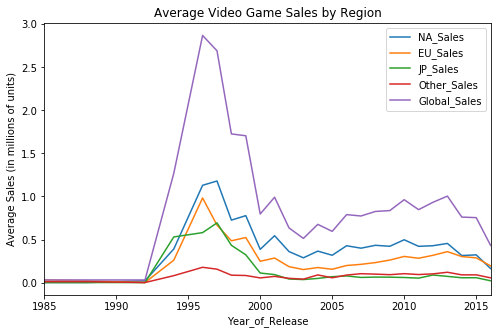

In [56]:
# Plot average video game sales per year
ax = data_by_year[sales_cols].agg(np.mean).plot(figsize=(8, 5), title='Average Video Game Sales by Region')
ax.set_ylabel('Average Sales (in millions of units)')

Once again we see North America in the lead with the most average sales per year. Japan sales averaged higher in the beginning, but over time falls behind NA and EU coming into the new decade. The rest of the world remains the lowest of the regions, averaging around .1 million units sold every year.

### 5.3 Highest Grossing Video Games

Here are the highest grossing video games in our dataset, we group by name to get the total sales per game across platforms and average its reviews:

In [4]:
# Get data for the highest grossing video games in our data set
data_by_game = data.groupby('Name')
# Get total sales and average reviews for each game
sales_rev_per_game = data_by_game[['Global_Sales', 'Critic_Score', 'User_Score']].agg({'Global_Sales': np.sum, 
                                                                                       'Critic_Score': np.mean, 
                                                                                       'User_Score': np.mean})
sales_rev_per_game.nlargest(10, columns='Global_Sales')

,Global_Sales,Critic_Score,User_Score
Name,,,
Wii Sports,82.53,76.0,8.000
Grand Theft Auto V,56.57,96.8,8.080
Super Mario Bros.,45.31,NaN,NaN
Tetris,35.84,NaN,NaN
Mario Kart Wii,35.52,82.0,8.300
Wii Sports Resort,32.77,80.0,8.000
Pokemon Red/Pokemon Blue,31.37,NaN,NaN
Call of Duty: Black Ops,30.82,82.0,5.940
Call of Duty: Modern Warfare 3,30.59,81.0,2.725


Unsurprisingly, a majority of the highest grossing video games are more recent, with a few classics like Super Mario Bros and Tetris making an appearance as well. Wii Sports lead in Global Sales coming in at 82.53 million units, about 26 million units more than the second most popular game sold. The more recent games all typically received a solid critic score, averaging at a score of 83.8 out of 100. The user scores reflect the critic scores well for the most part, with Call of Duty: Black Ops and Call of Duty: Modern Warefare 3 as outliers with scores of 5.9 and 2.7 (out of 10) respectively.

### 5.4 Analyzing Video Games based on Scores and Reviews

Let's look further in depth at scores and reviews. Here we see the top 20 video games ranked by __critic__ score:

In [24]:
# Group data my title and then aggregate by average critic and user scores across all platforms
func_map = {'Critic_Score': np.mean, 'Critic_Count': np.sum, 'User_Score': np.mean, 'User_Count': np.sum}
avg_review_per_game = data_by_game[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].agg(func_map)

In [25]:
avg_review_per_game.nlargest(20, columns=['Critic_Score', 'User_Score'])

,Critic_Score,Critic_Count,User_Score,User_Count
Name,,,,
SoulCalibur,98.000000,24,8.800000,200
Metroid Prime,97.000000,70,9.300000,747
Super Mario Galaxy 2,97.000000,87,9.100000,1854
Super Mario Galaxy,97.000000,73,8.900000,2147
NFL 2K1,97.000000,22,6.000000,47
Grand Theft Auto V,96.800000,245,8.080000,15124
Tony Hawk's Pro Skater 2,96.500000,35,7.600000,321
Tekken 3,96.000000,15,9.100000,367
The Legend of Zelda: The Wind Waker,96.000000,80,8.900000,968


SoulCalibur leads this list with a critic score of 98. Metroid Prime's critic score was second highest with 97, with most of the 747 users tending to agree with this score, giving it a solid 9.3 out of 10. An interesting observation is that out of the highest critic-scored games, none of the titles recevied a perfect score.
>When analyzing this data, it is important to note the Critic count and User count columns. These are the number of critics and users who participated in the scoring that led to the average scores given in the Critic score and User score columns. The titles with the higher counts will have a more accurate corresponding score. 

How do users feel about these games? Here are the top 20 video games ranked by __user__ score:

In [26]:
avg_review_per_game.nlargest(20, columns=['User_Score', 'Critic_Score'])[['User_Score', 'User_Count', 'Critic_Score', 
                                                                          'Critic_Count']]

,User_Score,User_Count,Critic_Score,Critic_Count
Name,,,,
Breath of Fire III,9.70,6,NaN,0
Boktai: The Sun is in Your Hand,9.60,16,83.0,31
Harvest Moon: Friends of Mineral Town,9.60,116,81.0,25
Golden Sun: The Lost Age,9.50,150,86.0,29
Super Puzzle Fighter II,9.50,4,83.0,22
Karnaaj Rally,9.50,4,81.0,9
Wade Hixton's Counter Punch,9.50,4,78.0,13
MLB SlugFest Loaded,9.50,4,77.0,30
Cory in the House,9.50,1273,NaN,0


This data showcases the disparity between users and critics as only one video game on this top 20 user scored list made it on the highest critic scored list: Metroid Prime. Many of the video games that users scored highly were not neccessarily the same as what critics felt. The game that users enjoyed was not SoulCalibur but instead Breath of Fire III, coming in with a score of 9.7 out of 10. Similarly to the previous example of the top 20 video games based on critic score, there is no perfect user score. 

There are some covert details worth mentioning in this data, however. For example, the top game scored by users only had 6 users scoring it which could have led to a biased rating. Other games in this set only have 4 or 5 users who scored as well. The top game does not have a critic score either, which is why it is important to remember that the original dataset is composed of games from 1980 to 2016, so critic scores may not exist for some older games such as Breath of Fire III (which originally came out in 1997), despite re-releasing later on on newer platforms. Additionally user reviews can be easily manipulated, for instance the game Cory in the House was [panned critically](https://en.wikipedia.org/wiki/Cory_in_the_House_(video_game)#Reception), but thanks to satirical reviews is amung the top 10 on our list ([Link to Metacritic Reviews](https://www.metacritic.com/game/ds/cory-in-the-house/user-reviews)). 

These important details should be considered when analyzing.

Below is a final overview of the average critic and user scores across all games, represented by density distributions:

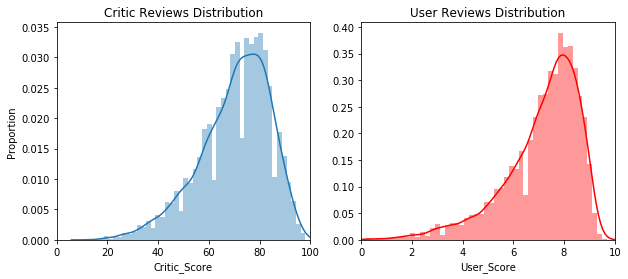

In [27]:
# Plot the density distributions for critic and user scores
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
ax1.set_xlim(0, 100)
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Proportion')
ax1.set_title('Critic Reviews Distribution')
ax2.set_xlim(0, 10)
ax2.set_xlabel('User Score')
ax2.set_title('User Reviews Distribution')
sb.distplot(data['Critic_Score'].dropna(), ax=ax1)
sb.distplot(data['User_Score'].dropna(), ax=ax2, color='red')

Both the distributions for critic and user reviews. Notice that both distributions are noteicably left skewed with a center of around 75 for critics and 80 for users. Notice that the critic reviews have a much smaller proportions, but also have 10x the range of the user reviews

### 5.5 Investigating Publisher Data

Text(0.5, 1.0, 'Sales from the Top 15 Publishers')

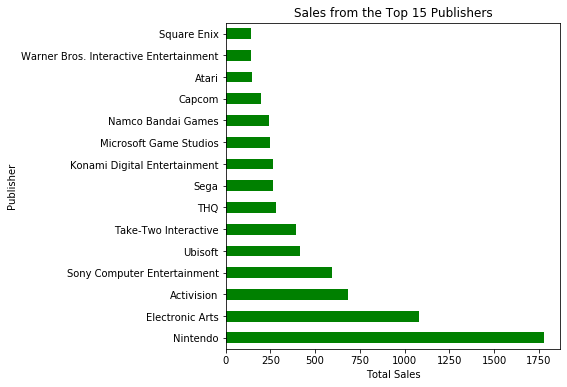

In [7]:
# Get data for the top 20 highest earning publicshers of all time
data_by_pub = data.groupby('Publisher')
top_publishers = data_by_pub['Global_Sales'].agg(np.sum).nlargest(15)
ax = top_publishers.plot(kind='barh', figsize=(6,6), color='green')
ax.set_xlabel('Total Sales')
ax.set_title('Sales from the Top 15 Publishers')

No surprise as Nintendo leads the way by a huge margin in total sales, with over 1750 million total units sold worldwide. Behind them is Electronic Arts at around 1075 million units sold and Activision at around 675 million units sold.

### 5.6 Which types of games are the most popular on which platforms?
Here we want to observe the total sales of every platform and genre. This visualization will give insight on what type of games are most popular and on what platforms. 

First we group by <font color=blue>genre</font> and <font color=red>platform</font> and sum together the number of sales:

In [18]:
arr = ['Genre', 'Platform']
grouped = data.groupby(arr)
sales_per_gp = grouped['Global_Sales'].agg(np.sum)
sales_per_gp.head()

Genre   Platform
Action  2600        29.34
        3DS         57.32
        DC           1.26
        DS          87.68
        GB           7.92
Name: Global_Sales, dtype: float64

Then we can pivot the dataset to see how the number of sales for each <font color=blue>genre</font> and <font color=red>platform</font> combination

In [19]:
# Reset the index to get Genre and Platorm into their own column. Then call pivot to set Platform as the index, the genres
# as the different columns and fill in the values with global sales. Finally fill any NaNs with 0
pivoted = sales_per_gp.reset_index().pivot(columns='Genre', index='Platform', values='Global_Sales').fillna(0.0)
pivoted.head(10)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,29.34,1.70,1.24,3.58,13.27,14.68,2.91,0.00,26.48,0.45,3.43,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,57.32,4.28,10.57,10.20,32.35,5.25,14.41,84.29,1.18,26.70,5.60,2.10
DC,1.26,2.50,1.83,0.00,2.54,0.00,2.65,0.68,0.33,0.52,3.66,0.00
DS,87.68,28.70,6.87,110.71,69.54,63.72,33.67,123.35,7.49,89.50,22.67,13.58
GB,7.92,17.16,0.00,13.35,54.91,47.47,4.55,88.24,1.20,3.55,9.05,8.05
GBA,40.51,8.39,4.00,32.77,66.58,8.99,14.85,64.09,2.26,5.85,10.62,7.38
GC,35.61,5.46,18.14,14.98,26.44,4.57,20.93,13.10,13.57,8.59,22.17,4.30
GEN,2.74,0.19,5.90,0.03,15.45,0.00,0.26,0.27,0.13,0.00,3.20,0.19


A heatmap will provide a good visualization to see which genres and platforms sell the most video games!

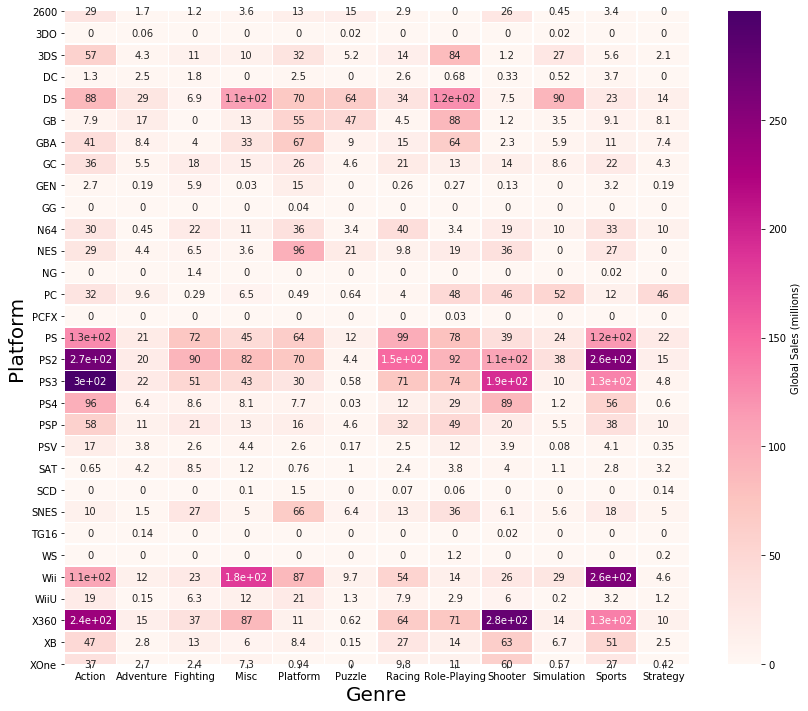

In [35]:
plt.figure(figsize=(14, 12))

heat_data = pivoted
heat_map = sb.heatmap(heat_data, annot = True, cmap = "RdPu", cbar_kws={'label': 'Global Sales (millions)'}, 
                      linewidths= .50)
plt.xlabel("Genre", fontsize = 20)
plt.ylabel("Platform", fontsize = 20)

heat_map

With a heatmap we can use different shades of color to represent the number of video games each genre and platform sells globablly. Darker shades represent more sales while later shades represent lower sales. We observe that consoles such as the PS2, PS3, Xbox 360, and Wii lead in terms of global sales compared to other platforms, which makes sense as these were the flagship consoles of Sony, Microsoft, and Nintendo during the modern golden age of video games. In terms of genre, Action genre games lead in sales with sports and shooter games following behind. 

### 5.7 Top Performing Platforms

Lastly, we will use the pivoted DataFrame from the previous section for a final summary of which platform had the most sales and how they compare to one another.

Text(0, 0.5, 'Sales (in millions)')

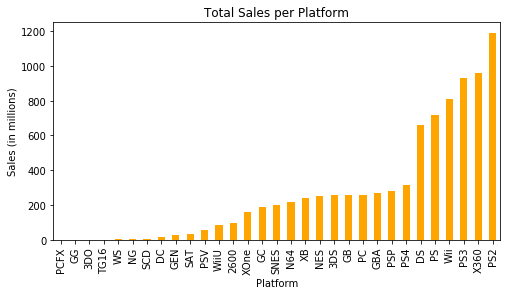

In [30]:
sales_per_platform =  pivoted.sum(axis=1).sort_values()
ax = sales_per_platform.plot.bar(title="Total Sales per Platform", figsize=(8, 4), color='orange')
ax.set_ylabel('Sales (in millions)')

As we can see the DS, PS, Wii, PS3, X360, and PS2 has the most sales and there is a noticable drop off after the DS. The Playstation series seemed to be the most popular of the platforms, with the PSP, PS4, PS, PS3, and PS2 taking 5 of the top 8 spots in the platforms with the most sales. 

## 6: Machine Learning and Analysis

Now that we have done some exploratory analysis on the data it is time to use conduct further analysis and generate predictions using machine learning!

### 6.1: Data Prepping

Before we begin the machine learning segment we first need to modify the data so that is machine learning ready. Since we want to predict total sales across all platforms, we will modify the data so that all data for a particular video game is on one row, including the major platforms it was released on. Additionally, categorically data such as genre, publisher, and platforms will have to be one-hot encoded.

In [5]:
# Use the data_by_game GroupBy object from earlier to condense the game data into one row
game_df = data_by_game.agg({'Global_Sales': np.mean, 'Critic_Score': np.mean, 'User_Score': np.mean, 'Year_of_Release': \
                              'first', 'Genre': 'first', 'Publisher': 'first'}).dropna()
game_df.head()

,Global_Sales,Critic_Score,User_Score,Year_of_Release,Genre,Publisher
Name,,,,,,
Tales of Xillia 2,0.84,71.0,7.9,2012,Role-Playing,Namco Bandai Games
.hack//Infection Part 1,1.27,75.0,8.5,2002,Role-Playing,Atari
.hack//Mutation Part 2,0.68,76.0,8.9,2002,Role-Playing,Atari
.hack//Outbreak Part 3,0.46,70.0,8.7,2002,Role-Playing,Atari
007 Racing,0.53,51.0,4.6,2000,Racing,Electronic Arts


In [8]:
# Only include the top 10 publishers
game_df['Publisher'] = game_df['Publisher'].apply(lambda x: x if x in top_publishers[0:10] else np.NaN)
game_ohe = pd.get_dummies(game_df)
game_ohe.head()

,Global_Sales,Critic_Score,User_Score,Year_of_Release,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_Activision,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft
Name,,,,,,,,,,,,,,,,,,,,,
Tales of Xillia 2,0.84,71.0,7.9,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Infection Part 1,1.27,75.0,8.5,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Mutation Part 2,0.68,76.0,8.9,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Outbreak Part 3,0.46,70.0,8.7,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007 Racing,0.53,51.0,4.6,2000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
# Add one hot encoding for major platforms
top_platforms = ['PS', 'Wii', 'PS3', 'X360', 'PS2']
# Create a new DataFrame that is a zero matrix for the top five platforms above
z_matrix = pd.DataFrame(np.zeros((len(game_ohe), 5), dtype=np.int8), \
                        columns=["Platform_{}".format(plat) for plat in top_platforms], \
                        index=game_ohe.index)
# Join this DataFrame to the game df above
ml_ready = pd.concat((game_ohe, z_matrix), axis=1)
# Go through every row in the raw data, if its game is in the game dataset and its platform is one of the top platforms, set
# the respective value in the ml_ready df to 1
for _, row in data.iterrows():
    if row['Platform'] in top_platforms and row['Name'] in ml_ready.index:
        ml_ready.loc[row['Name'], 'Platform_{}'.format(row['Platform'])] = 1
# Our dataset is now ready for machine learning!
ml_ready.head(n=8)

,Global_Sales,Critic_Score,User_Score,Year_of_Release,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft,Platform_PS,Platform_Wii,Platform_PS3,Platform_X360,Platform_PS2
Name,,,,,,,,,,,,,,,,,,,,,
Tales of Xillia 2,0.840,71.0,7.900,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
.hack//Infection Part 1,1.270,75.0,8.500,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
.hack//Mutation Part 2,0.680,76.0,8.900,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
.hack//Outbreak Part 3,0.460,70.0,8.700,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
007 Racing,0.530,51.0,4.600,2000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
007: Quantum of Solace,0.746,63.5,6.875,2008,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
007: The World is not Enough,1.235,61.0,6.700,2000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1 vs. 100,0.080,38.0,3.200,2008,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6.2: Preforming Analysis

For our machine learning model we decided to use scikit-learn's RandomForestRegressor model to generate predictions for a games total sales. We set the numberer of estimators, or decision trees, to 30 and the max depth to a upper limit of 50. We will split the data set into train and test set, with 70% of values going into the train set.

In [29]:
X = ml_ready[ml_ready.columns[1:]]
y = ml_ready['Global_Sales']
# Split data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=37)
# Create and fit a RandomForest model
rf = RandomForestRegressor(n_estimators=30, max_depth=50).fit(X_train, y_train)
# Get the R^2 value
rf.score(X_train, y_train)

0.8908164249678173

This gives us an $R^2$ score of around 0.89 (actual values will vary). This can be interpeted as saying that 89% of the variance in the data set is explained by our model - a rather good score.

### 6.3: Testing Our Model

Now that the model is created, we can test it against the test data to see how well our model is at predicting the total sales for any given video game. We will use the average absolute error and standard deviation for these results

In [1]:
# Get the predicted values for the test data
y_pred = rf.predict(X_test)
print("Mean value: %f" % mean_absolute_error(y_test, y_pred))
print("Variance: %f" % mean_squared_error(y_test, y_pred))

NameError: name 'rf' is not defined

Our model worked reasonably well at being able to predict the total sales. The average absolute difference was 0.7, or $700,000, and the variance was 7.98 (standard deviation was 2.82)

# 7. Concluding Thoughts

As more and more video games and platforms are released over time, it will be interesting to see how their popularity stacks up against their previous generations. We saw with the success of platforms like the PS2 and video games like Super Mario Bros. that newer does not always mean better. Sometimes a publisher comes out with a classic game or console that sticks with users for decades, or that critics enjoy, or that simply sells millions. The goal of this tutorial was to provide insight on these trends and to showcase how gamers themselves can use data like this to further analyze their favorite games and platforms. 

The video game world continues to grow, so exploration does not have to stop here! The virtual reality experience is starting to come front and center with new platforms like the Occulus Rift, and this technology is even becoming mobile with smartphone compatabilities as well. This adds a brand new dimension to gaming and it could be interesting to use what you have learned in this tutorial and apply it there! Even if gaming is not of highest interest to you, the skills and analysis performed here can be applicable in many other aspects. This tutorial was an example of how you can manipulate datasets for analysis and machine learning while demonstrating the steps of the data science pipeline, and we hope that you found it useful and insightful.

Thank you for reading!